In [3]:
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [4]:
preds = {}
models = ['IV3', 'IRNV2', 'DN121', 'RN50']
for pred in os.listdir('../results/preds'):
    if 'InceptionV3' in pred:
        preds['IV3'] = pd.read_csv('../results/preds/' + pred)
    elif 'InceptionResNetV2' in pred:
        preds['IRNV2'] = pd.read_csv('../results/preds/' + pred)
    elif 'DenseNet121' in pred:
        preds['DN121'] = pd.read_csv('../results/preds/' + pred)
    elif 'ResNet50' in pred:
        preds['RN50'] = pd.read_csv('../results/preds/' + pred)

In [7]:
tpr_dict = {}
fpr_dict = {}
precision_dict = {}
recall_dict = {}
for model in models:
    fpr_dict[model], tpr_dict[model], _ = roc_curve(preds[model]['y_true'], preds[model]['y_pred'])
    precision_dict[model], recall_dict[model], _ = precision_recall_curve(preds[model]['y_true'], preds[model]['y_pred'])

In [9]:
pr_baseline = preds['IV3']['y_true'].sum() / preds['IV3']['y_true'].shape[0]
pr_baseline

0.017983651226158037

In [10]:
auroc_dict = {}
auprc_dict = {}
for model in models:
    auroc_dict[model] = auc(fpr_dict[model], tpr_dict[model])
    auprc_dict[model] = auc(recall_dict[model], precision_dict[model])

In [11]:
#get the Blues_d colormap from seaborn
cmap = sns.color_palette("Blues_d", len(models))

/tmp/ipykernel_517368/4068651292.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, 1], [0, 1], 'k--', color='grey', label='Baseline')
/tmp/ipykernel_517368/4068651292.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0, 1], [pr_baseline, pr_baseline], 'k--', color='grey', label='Baseline')


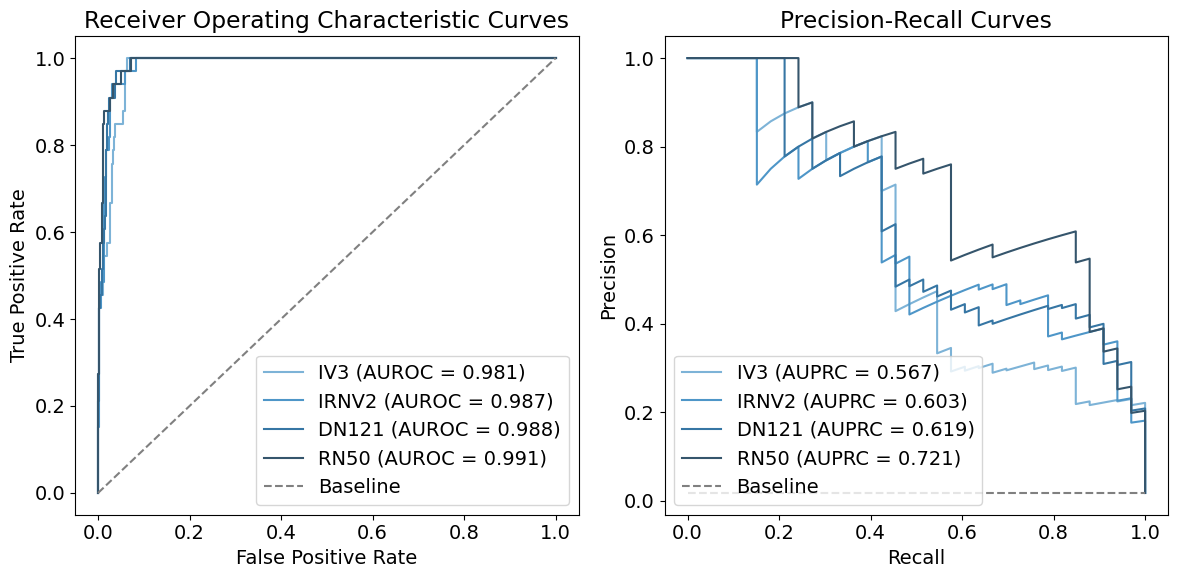

In [21]:
#plot the roc and pr curves on two adjacent subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for model in models:
    ax1.plot(fpr_dict[model], tpr_dict[model], label=model + ' (AUROC = {:.3f})'.format(auroc_dict[model]), color=cmap[models.index(model)])
    ax2.plot(recall_dict[model], precision_dict[model], label=model + ' (AUPRC = {:.3f})'.format(auprc_dict[model]), color=cmap[models.index(model)])
ax1.plot([0, 1], [0, 1], 'k--', color='grey', label='Baseline')
ax2.plot([0, 1], [pr_baseline, pr_baseline], 'k--', color='grey', label='Baseline')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax1.set_title('Receiver Operating Characteristic Curves')
ax2.set_title('Precision-Recall Curves')
ax1.legend()
ax2.legend(loc='lower left')
plt.tight_layout()
plt.rcParams.update({'font.size': 14})
plt.savefig('../results/oob_curves.png', bbox_inches='tight', dpi=600)

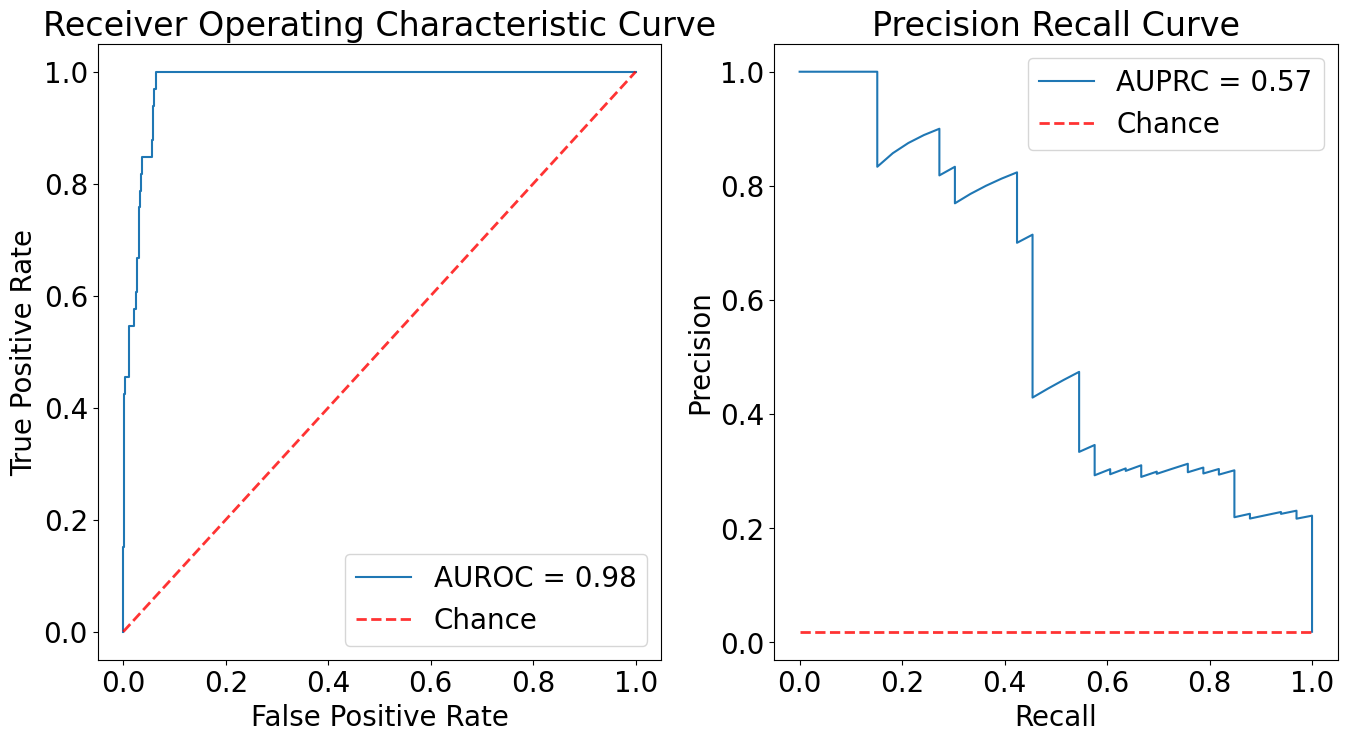

In [16]:
#plot the roc and pr curves on two adjacent subplots
AUROC = auc(tpr, fpr)
AUPRC = auc(recall, precision)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.plot(tpr, fpr, label='AUROC = %0.2f' % AUROC)
ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic Curve')
ax1.legend(loc="best")
ax2.plot(recall, precision, label='AUPRC = %0.2f' % AUPRC)
ax2.plot([0, 1], [pr_baseline, pr_baseline], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision Recall Curve')
ax2.legend(loc="best")
#increase the font size of the legend
plt.rcParams.update({'font.size': 20})
plt.savefig('../results/inceptionv3_curves.png', dpi=300, bbox_inches='tight')